# Raymond Pearl Model Application for World Wind Energy Production

Uğurhan Aksu

### Outline

1. Packages
2. Data
3. Yearly Propotions
4. The Model
5. Predictions

### 1. Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import math

### 2. Data

The data is manually obtained from wwindea.org presentation in Shanghai,2014 and plotted to observe the capacity installment trend. Here it is visible that the increase is exponential.

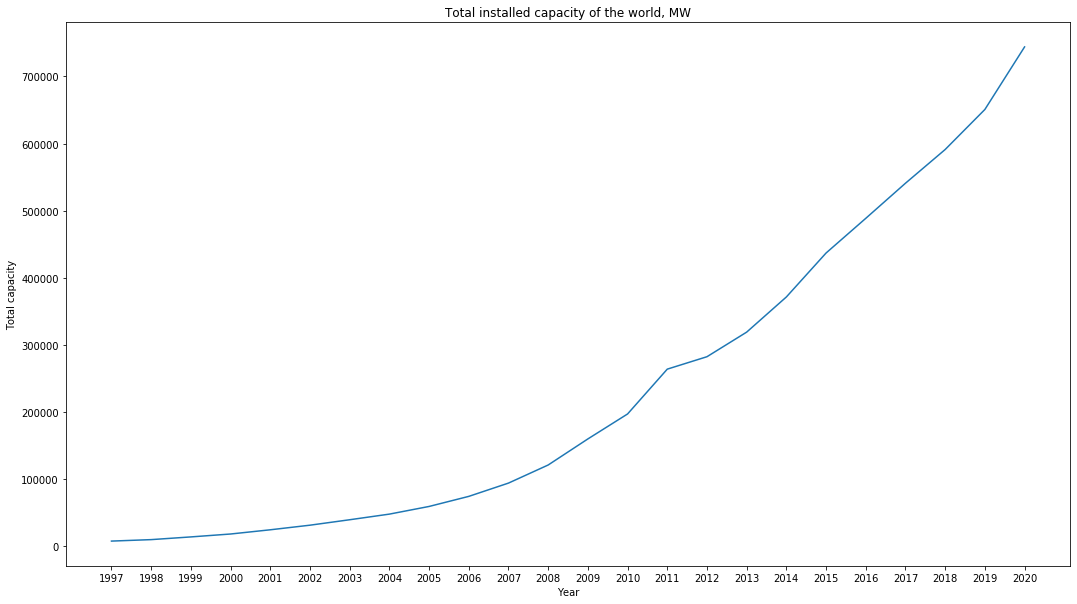

In [2]:
# Total installed capacity, MW
worldCap = [ 7480, 9667, 13700, 18039, 24322,
           31181, 39295, 47681, 59102, 74122,
           93919, 120894, 159742, 196944, 263749,
           282275, 318919, 371336, 436828, 488508,
           540840, 591091, 650758, 744000]

# time interval
yearList = []
initialYear = 1997
while initialYear <2021:
    yearList.append(initialYear)
    initialYear += 1
    
dataDf = pd.DataFrame({
    "Year" : yearList,
    "Capacity" : worldCap
})
dataDf.set_index("Year", inplace=True )

#graph
plt.figure( figsize=(18,10) )
plt.xticks(dataDf.index.values)
plt.plot( dataDf.index.values, dataDf["Capacity"])
plt.title( "Total installed capacity of the world, MW" )
plt.xlabel( "Year" )
plt.ylabel( "Total capacity" )
plt.show()


### 3. Yearly Propotions

The blue line represents the fraction of total present installed capacity of the indicated year, over the total capacity of 2020. Where as the orange line demonstrates the each years individual contribution proportion to the total capacity.

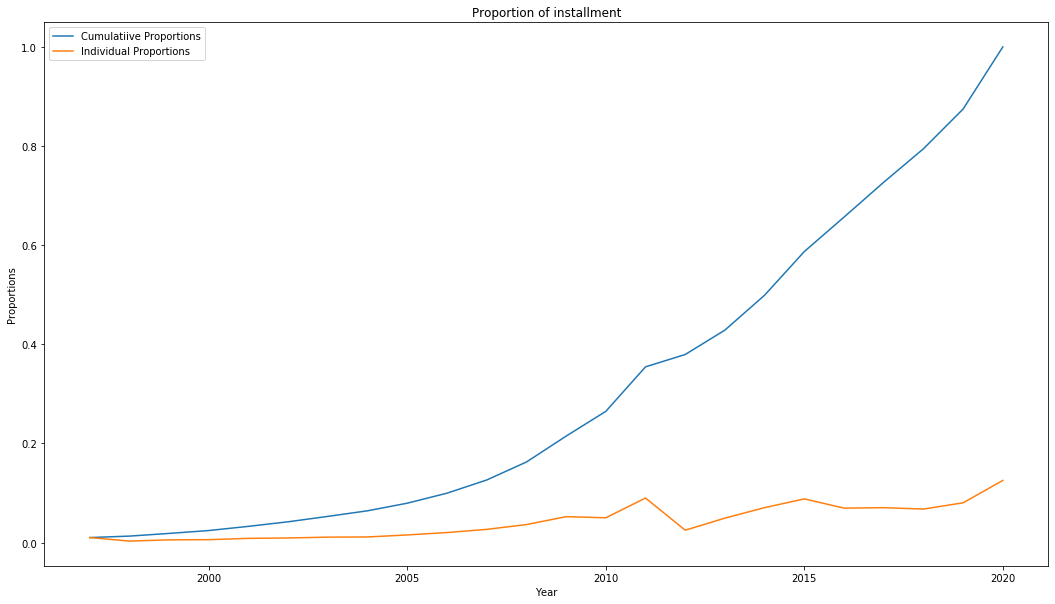

Data Frame:


,Capacity,Proportions,Individual Proportions
Year,,,
1997,7480,0.010054,0.010054
1998,9667,0.012993,0.002940
1999,13700,0.018414,0.005421
2000,18039,0.024246,0.005832
2001,24322,0.032691,0.008445
2002,31181,0.041910,0.009219
2003,39295,0.052816,0.010906
2004,47681,0.064087,0.011272
2005,59102,0.079438,0.015351


In [3]:
#Yearly, individual and cumulative proportions
proportions = [0]
individual_proportions = []
for i in dataDf.index.values:
    proportions.append( (dataDf.loc[i,"Capacity"] / max(dataDf.loc[:,"Capacity"].values)) )
    individual_proportions.append( proportions[dataDf.loc[:i,:].shape[0]] - proportions[dataDf.loc[:i,:].shape[0]-1] )
del proportions[0]
#integrating to source data
dataDf["Proportions"] = proportions
dataDf["Individual Proportions"] = individual_proportions

#graph
plt.figure( figsize=(18,10) )
plt.plot(dataDf.index.values,
        dataDf["Proportions"].values,
        label="Cumulatiive Proportions")
plt.plot(dataDf.index.values,
        dataDf["Individual Proportions"].values,
        label="Individual Proportions")
plt.title("Proportion of installment")
plt.xlabel("Year")
plt.ylabel("Proportions")
plt.legend()
plt.show()

print("Data Frame:")
dataDf


### 4. The Model

Cumulative proportions (blue line) in section 3 is considered as the fraction of market penetration in the Raymond Pearl Model. Fraction values are passed through ln( 1/f - 1 ) function and a regression model is built on the outputs. To obtain overlapping charts, year 1997 is utilized as period 1 and the remaining incrementally. Regression is applied to the period between the first data point and the last data point at the date of the presentation, 2014. Reg-score value of .99 demonstrates that the model is a good fit.

Regression intercept:  4.894800516770942
Regression slope:  -0.27990057153493847
Reg score:  0.9960269440415964


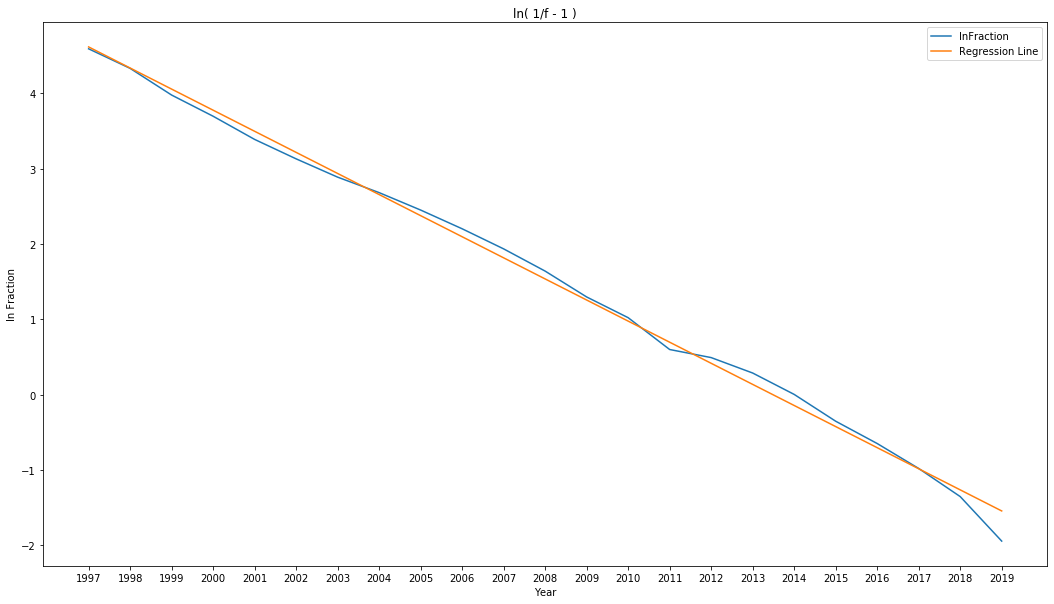

Model Data:


,Year,lnFraction
Period,,
1.0,1997,4.589704
2.0,1998,4.330245
3.0,1999,3.976060
4.0,2000,3.694960
5.0,2001,3.387423
6.0,2002,3.129419
7.0,2003,2.886682
8.0,2004,2.681275
9.0,2005,2.450005


In [4]:
#ln( 1/f - 1 ) function
modelYear = []
lnFraction = []
i = dataDf.index.values.min()
while i < dataDf.index.values.max():
    modelYear.append(i)
    lnFraction.append( np.log( 1/dataDf.loc[i,"Proportions"] -1 ) )
    i += 1

# model data 
modelDf = pd.DataFrame({
    "Period":list(np.linspace(1,len(modelYear),len(modelYear))),
    "Year":modelYear,
    "lnFraction":lnFraction
})  
#modelDf.set_index("Year",inplace=True)

#regression parameters
reg = LinearRegression().fit( modelDf[["Period"][:2014]] , modelDf["lnFraction"][:2014])
print("Regression intercept: ", reg.intercept_)
print("Regression slope: ", reg.coef_[0])
print("Reg score: ",reg.score( modelDf[["Period"][:2014]] , modelDf["lnFraction"][:2014]))

#regression line
regLine = []
for i in modelDf.index.values:
    regLine.append( reg.intercept_ + reg.coef_[0]*modelDf.loc[i,"Period"]  )

#graph
plt.figure( figsize=(18,10) )
plt.plot(modelDf.Year,
        modelDf["lnFraction"].values,
        label="lnFraction")
plt.plot(modelDf.Year,
        regLine,
        label="Regression Line")
plt.title("ln( 1/f - 1 )")
plt.ylabel( "ln Fraction" )
plt.xlabel("Year")
plt.legend()
plt.xticks( modelDf.Year )
plt.show()

print( "Model Data:" )
modelDf.set_index("Period", inplace=True)
modelDf

### 5. Predictions

The regression model is iterated beyond the data time horizon in order to estimate the year of achieving full potential. Full market potential is expected to be breached in year 2040, since increments above %99.9 is neglectable.

In [5]:
#Acheving total potential
potentialPred = []
i=0
while ( 1/(math.exp( reg.intercept_ + reg.coef_[0]*i)+1) ) < 0.999:
    i += 1
    potentialPred.append( 1/(math.exp( reg.intercept_ + reg.coef_[0]*i)+1) )

print("Total potential of %99.9 is breached at period:", i,",","year:",modelDf["Year"].min()+i)

Total potential of %99.9 is breached at period: 43 , year: 2040


The data which the model is built on represents the total installed capacity. To estimate energy production of the capacity, utilization rate of 2009 is employed as a multiplier for all years. Predictions initially surpass the actual values greatly. Concavity of the prediction line implies that eventually the gap between the predictions and the actual values will decrease. However, it is visible that Raymond Pearl model is not conforming enough for this particular application.

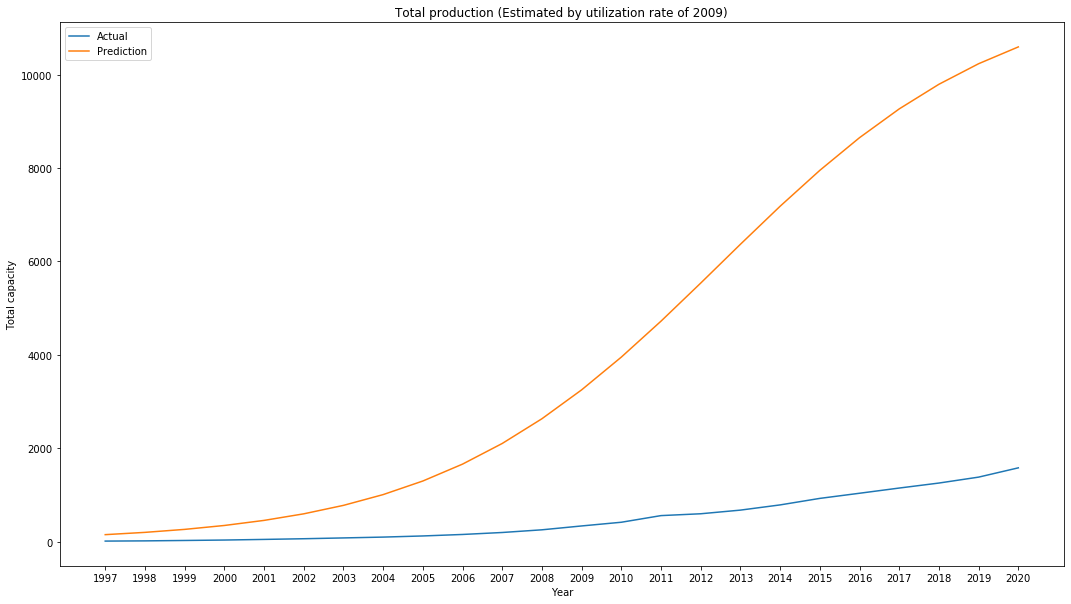

Results:


,Capacity,Actual Production,Prediction Production
Year,,,
1997,7480,15.920672,153.715006
1998,9667,20.575553,202.518733
1999,13700,29.159520,266.465471
2000,18039,38.394787,349.998972
2001,24322,51.767725,458.685424
2002,31181,66.366641,599.369104
2003,39295,83.636739,780.255738
2004,47681,101.485771,1010.843859
2005,59102,125.794594,1301.590800


In [6]:
#predictions
r = 340/159742 # utilization rate of 2009, TWh/MW
cumPred = [] #cumulative predictions
indPred = [0] #individual predictions
actualProd = [] #Actual production
for i in range(1,modelDf.shape[0]+2):
    cumPred.append( potentialPred[i]*sum(dataDf.loc[:,"Capacity"].values)*r )
    indPred.append( (potentialPred[i] - potentialPred[i-1])*sum(dataDf.loc[:,"Capacity"].values)*r )
    actualProd.append( dataDf.iloc[i-1,0]*r )
del indPred[0]

dataDf["Actual Production"] = actualProd
dataDf["Prediction Production"] = cumPred

plt.figure( figsize=(18,10) )
plt.xticks(dataDf.index.values)
plt.plot( dataDf.index.values, actualProd, label="Actual")
plt.plot( dataDf.index.values, cumPred, label="Prediction")
plt.title( "Total production (Estimated by utilization rate of 2009)" )
plt.xlabel( "Year" )
plt.ylabel( "Total capacity" )
plt.legend()
plt.show()

print("Results:")
dataDf[["Capacity","Actual Production","Prediction Production"]]